# Federal University of Ceará
# Teleinformatics Departament
# Graduate Program in Teleinformatics Engeneering
## TIP8419 - Tensor Algebra
## Homework 0 - Hadamard, Kronecker and Khatri-Rao Products
### Function testing and simulation results

- Ezequias Márcio - 497779

To run this notebook properly, it is necessary Python3 installed alongside alongside with the packages listed below:

- `numpy 1.17.2`
- `tensorly 0.4.5`
- `matplotlib 3.1.1`
- `seaborn 0.9.0`
- `tdqm 4.36.1`

Make sure that the file `tensoralg.py` is in the same directory as this notebook.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensoralg # Module created for this hw
from tensorly.tenalg import khatri_rao
from time import perf_counter_ns
from tqdm import tqdm
sns.set_style("whitegrid")
np.set_printoptions(3)

In [4]:
# Number of rows/columns:
n = np.array([2,4,8,16,32,64])#,128]) 128x128 is too much for 6Gb of ram =,(
             
# Variables to store the time values:
dt_hadamard = np.zeros_like(n)
dt_kron = np.zeros_like(n)
dt_khatri = np.zeros_like(n)

dt_my_hadamard = np.zeros_like(n)
dt_my_kron = np.zeros_like(n)
dt_my_khatri = np.zeros_like(n)

### Testing functions

In [5]:
# Matrices for testing:
M, N = 3, 2
A = np.random.rand(M, 2*N).view(np.complex_)
B = np.random.rand(M, 2*N).view(np.complex_)
print(f'''A
{A, A.shape}
B
{B, B.shape}
''')
# Hadamard product:
my_hadamard = tensoralg.hd_product(A,B)
hadamard = A*B

# Kronecker product:
my_kronecker = tensoralg.kron(A,B)
kronecker = np.kron(A,B)

# Khatri-Rao Product:
my_khatri = tensoralg.kr(A, B) 
khatri = khatri_rao([A,B])

print(f'''Hadamard - test: {np.allclose(my_hadamard, hadamard)} 

impelmented:
{my_hadamard, my_hadamard.shape}

python:
{hadamard, hadamard.shape}

Kronecker - test: {np.allclose(my_kronecker, kronecker)}

impelmented:
{my_kronecker, my_kronecker.shape}

python:
{kronecker, kronecker.shape}

Khatri-Rao - test: {np.allclose(my_khatri, khatri)}

impelmented:
{my_khatri, my_khatri.shape}

python:
{khatri, khatri.shape}
''')

A
(array([[0.818+0.495j, 0.302+0.368j],
       [0.925+0.859j, 0.976+0.75j ],
       [0.143+0.058j, 0.878+0.663j]]), (3, 2))
B
(array([[0.675+0.775j, 0.508+0.311j],
       [0.079+0.442j, 0.103+0.623j],
       [0.361+0.059j, 0.514+0.223j]]), (3, 2))

Hadamard - test: True 

impelmented:
(array([[ 0.168+0.967j,  0.039+0.281j],
       [-0.306+0.476j, -0.366+0.685j],
       [ 0.048+0.029j,  0.303+0.536j]]), (3, 2))

python:
(array([[ 0.168+0.967j,  0.039+0.281j],
       [-0.306+0.476j, -0.366+0.685j],
       [ 0.048+0.029j,  0.303+0.536j]]), (3, 2))

Kronecker - test: True

impelmented:
(array([[ 0.168+0.967j,  0.262+0.506j, -0.082+0.482j,  0.039+0.281j],
       [-0.154+0.401j, -0.224+0.56j , -0.139+0.162j, -0.198+0.226j],
       [ 0.266+0.227j,  0.31 +0.437j,  0.087+0.151j,  0.073+0.257j],
       [-0.042+1.296j,  0.203+0.724j,  0.078+1.262j,  0.263+0.684j],
       [-0.306+0.476j, -0.44 +0.665j, -0.254+0.491j, -0.366+0.685j],
       [ 0.284+0.365j,  0.284+0.647j,  0.309+0.328j,  0.334+0.603

### Performance simulations

In [33]:
for idx, val in enumerate(tqdm(n)):
    # Generating N x N matrices:
    A = np.random.rand(val, 2*val).view(np.complex_)
    B = np.random.rand(val, 2*val).view(np.complex_)
    
    # Hadamard:
    ti = perf_counter_ns()
    A*B  # measuring the execution time
    tf = perf_counter_ns()
    dt_hadamard[idx] = tf - ti

    ti = perf_counter_ns()
    tensoralg.hd_product(A, B) # measuring the execution time
    tf = perf_counter_ns()
    dt_my_hadamard[idx] = tf - ti
    
    # Kronecker:
    ti = perf_counter_ns()
    np.kron(A, B) # measuring the execution time
    tf = perf_counter_ns()
    dt_kron[idx] = tf - ti 
    
    ti = perf_counter_ns()
    tensoralg.kron(A, B) # measuring the execution time
    tf = perf_counter_ns()
    dt_my_kron[idx] = tf - ti

    # Khatri-Rao
    ti = perf_counter_ns() 
    khatri_rao([A, B]) # measuring the execution time
    tf = perf_counter_ns()
    dt_khatri[idx] = tf - ti

    ti = perf_counter_ns()
    tensoralg.kr(A, B) # measuring the execution time
    tf = perf_counter_ns()
    dt_my_khatri[idx] = tf - ti

100%|██████████| 6/6 [00:00<00:00,  8.64it/s]


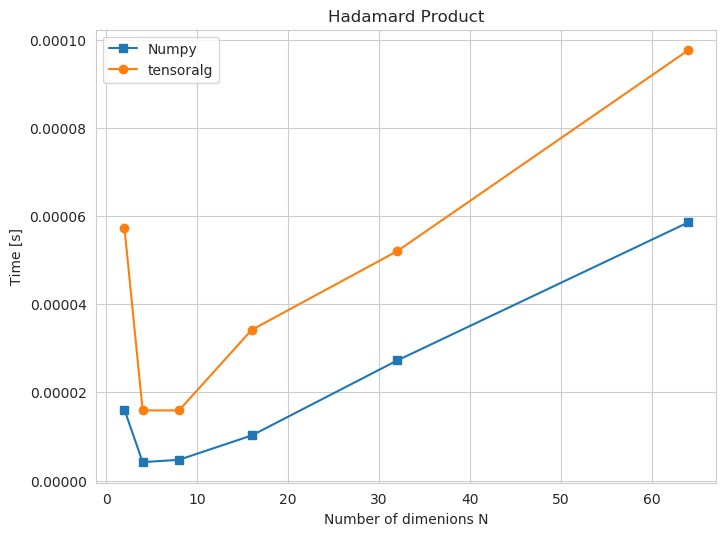

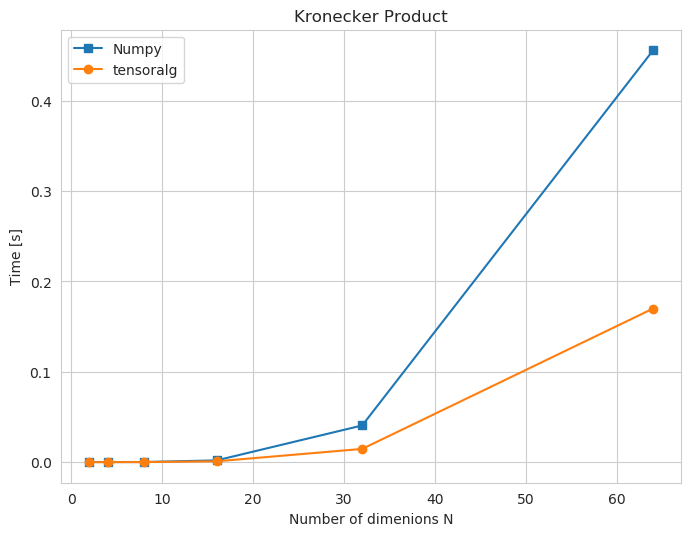

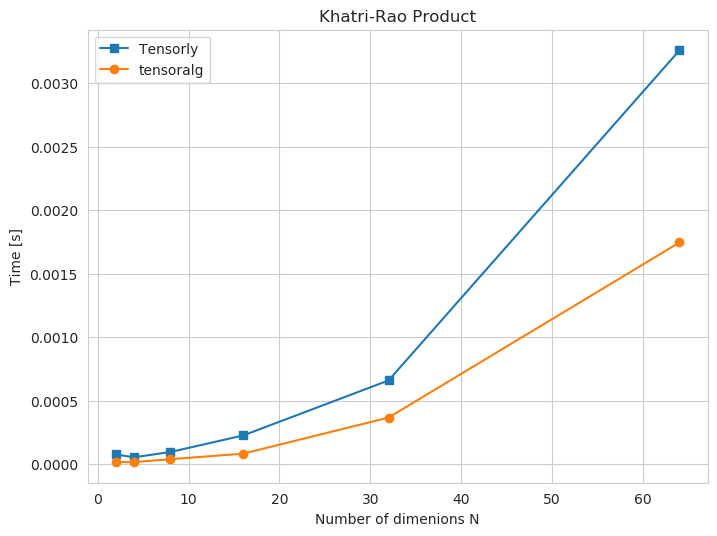

In [47]:
# Plots:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(n, dt_hadamard*1e-9, '-s', label='Numpy')
ax.plot(n, dt_my_hadamard*1e-9, '-o', label='tensoralg')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Hadamard Product')
ax.legend()
# plt.savefig('reports/figs/hadm.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(n, dt_kron*1e-9, '-s', label='Numpy')
ax.plot(n, dt_my_kron*1e-9, '-o', label='tensoralg')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Kronecker Product')
ax.legend()
# plt.savefig('reports/figs/kron.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(n, dt_khatri*1e-9, '-s', label='Tensorly')
ax.plot(n, dt_my_khatri*1e-9, '-o', label='tensoralg')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Khatri-Rao Product')
ax.legend()
# plt.savefig('reports/figs/krao.pdf')
plt.show()